# Numerics 1: Homework 05

## Setup

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set()

## Problem 1

We will consider the system $\mathbf{Ax}=\mathbf{b}$, with $\mathbf{A}$ and $\mathbf{b}$ defined in the code below, and we will examine various stationary iteration schemes in relation to this problem.

In [60]:
A = np.array([[4,-1,0,-1,0,0],
            [-1,4,-1,0,-1,0],
            [0,-1,4,-1,0,-1],
            [-1,0,-1,4,-1,0],
            [0,-1,0,-1,4,-1],
            [0,0,-1,0,-1,4]])

b = np.array([2,1,2,2,1,2]).reshape((6,1))

print(A.shape)
print(b.shape)

(6, 6)
(6, 1)


All of the following stationary iterations will be using $\epsilon=1E-7$, and some combination of the standard splitting which we compute below.

In [61]:
eps = 1E-7 #Tolerance

L = np.tril(A, -1) #Lower triangular
U = np.triu(A, 1) #Upper triangular

D = np.tril(np.triu(A)) #Diagonal

### a).
We use Gauss-Jacobi to approximate the solution. Gauss-Jacobi is given by the following iteration:

$$ \mathbf{x}_{k+1} = -\mathbf{D}^{-1}(\mathbf{L}+\mathbf{U})\mathbf{x}_k + \mathbf{D}^{-1}\mathbf{b} $$

In [62]:
err = np.inf #Initial error
x_0 = np.zeros(b.shape) #Initial solution

#Pre-compute static matrices
D_inv = np.linalg.inv(D)
D_invL_U = D_inv@(L+U)
D_invb = D_inv@b

numI = 0 #Number of iterations

while(err >= eps):
    x_k = -D_invL_U@x_0 + D_invb
    
    #Compute error
    err = np.linalg.norm(x_k-x_0, ord=np.inf)/np.linalg.norm(x_k, ord=np.inf) #Using 2-norm
    
    #Count iterations
    numI += 1
    
    x_0 = x_k

In [63]:
print('Solution in %s iterations:\n\n x =' % numI, end=' ')
print(x_0, end='\n\n')
print('Final Error: %.7f' % np.linalg.norm(A@x_0-b))

Solution in 41 iterations:

 x = [[1.1666665 ]
 [1.20833311]
 [1.45833311]
 [1.45833311]
 [1.20833311]
 [1.1666665 ]]

Final Error: 0.0000006


### b).
We use Gauss-Siedel to approximate the solution. Gauss-Seidel is given by the following iteration:

$$ \mathbf{x}_{k+1} = -(\mathbf{D}+\mathbf{L})^{-1}\mathbf{U}\mathbf{x}_k + (\mathbf{D}+\mathbf{L})^{-1}\mathbf{b} $$

In [64]:
err = np.inf #Initial error
x_0 = np.zeros(b.shape) #Initial solution

#Pre-compute static matrices
D_L_inv = np.linalg.inv(D+L)
D_L_invU = D_L_inv@U
D_L_invb = D_L_inv@b

numI = 0

while(err >= eps):
    x_k = -D_L_invU@x_0 + D_L_invb
    
    #Compute error
    err = np.linalg.norm(x_k-x_0, ord=np.inf)/np.linalg.norm(x_k, ord=np.inf) #Using 2-norm
    
    #Count iterations
    numI += 1
    
    x_0 = x_k

In [65]:
print('Solution in %s iterations:\n\n x =' % numI, end=' ')
print(x_0, end='\n\n')
print('Final Error: %.7f' % np.linalg.norm(A@x_0-b))

Solution in 23 iterations:

 x = [[1.16666658]
 [1.20833324]
 [1.45833325]
 [1.45833326]
 [1.20833327]
 [1.16666663]]

Final Error: 0.0000003


### c).
We use SOR with $\omega=1.6735$ to approximate the solution. SOR is given by the following iteration.

$$ \mathbf{x}_{k+1} = (\mathbf{D}-\omega\mathbf{L})^{-1}[(1-\omega)\mathbf{D}+\omega\mathbf{U}]\mathbf{x}_k + \omega(\mathbf{D}-\omega\mathbf{L})^{-1}\mathbf{b} $$

In [66]:
#Only defining this one as a function so we can look at changing omega.
def SOR(A, b, w):
    err = np.inf #Initial error
    x_0 = np.zeros(b.shape) #Initial solution

    #Pre-compute static matrices
    T = np.linalg.inv(D+w*L)
    Z = T@((1-w)*D - w*U)
    Tb = w*(T@b)

    numI = 0 #Number of iterations

    while(err >= eps):
        x_k = Z@x_0 + Tb

        #Compute error
        err = np.linalg.norm(x_k-x_0, np.inf)/np.linalg.norm(x_k, np.inf) #Using 2-norm

        #Count iterations
        numI += 1

        x_0 = x_k
        
    return x_0, numI
        
sol, numI = SOR(A, b, 1.6735)

In [67]:
print('Solution in %s iterations:\n\n x =' % numI, end=' ')
print(sol, end='\n\n')
print('Final Error: %.7f' % np.linalg.norm(A@x_0-b))

Solution in 50 iterations:

 x = [[1.16666664]
 [1.20833334]
 [1.45833336]
 [1.45833327]
 [1.20833335]
 [1.16666666]]

Final Error: 0.0000003


### d).
We can see that $\boxed{\text{Gauss-Siedel}}$ has converged the fastest at 23 iterations -- SOR and Gauss-Jacobi taking 50 and 41 iterations respectively. One should not always expect this to be the case. In fact, this runs counter to what one might assume as SOR is just a sped up version of the same iteration. Although, the important thing to note is that it is sped up for some choices of $\omega$. Thus we expect other choices of $\omega$ to result in faster convergence for SOR compared to Gauss-Siedel. 

### e).
Letting $c=||\mathbf{B}||$ (from the standard stationary iteration) we look at the following error estimate.

$$ ||\mathbf{x}_{k+1}-\mathbf{x}_k||\leq\frac{c}{1-c}||\mathbf{x}_{k+1}-\mathbf{x}_k|| $$

With this error estimate we can then derive bounds for the last computed approximations in all three cases above.

### f).
We can vary the $\omega$ parameter in SOR to see how that affects the solution and the convergence time. We will note that the iteration will converge for a SPD matrix with any initial guess if $\omega\in(0,2)$ (*Numerical Analysis 10e*). So we will look at a number of values for $\omega$ in this range and examine the number of iterations to converge.

In [68]:
w_vec = np.arange(0.1,2,0.1)
I_vec = []
for w in w_vec:
    _, I = SOR(A, b, w)
    I_vec.append(I)

Minimum: 1.200000, Iterations: 15.000000


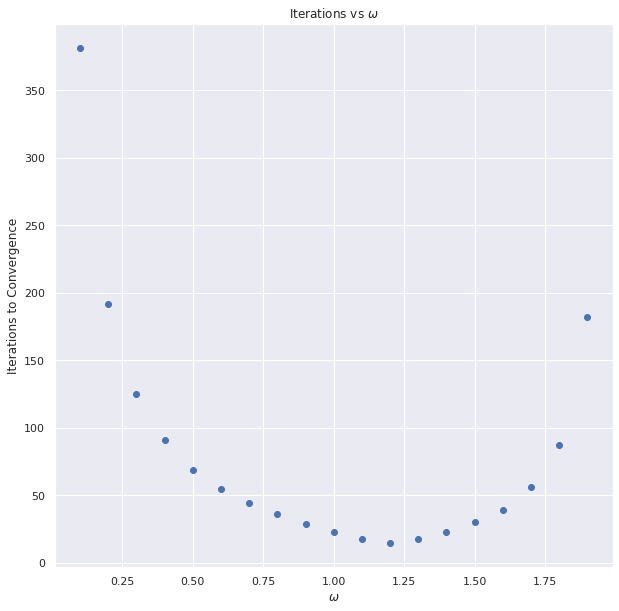

In [69]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(w_vec, I_vec)

ax.set_title(r'Iterations vs $\omega$')
ax.set_ylabel('Iterations to Convergence')
ax.set_xlabel(r'$\omega$');
print('Minimum: %f, Iterations: %f' % (w_vec[np.argmin(I_vec)], min(I_vec)))

In the scatter plot above we see the number of iterations to convergence as a function of the parameter $\omega$ in SOR. For the omega values investigated here (and as can be seen in the figure) the minimum is achieved with $\omega=1.2$, and converges in 15 iterations. Thus, we see that altering $\omega$ can have a dramatic effect on the rate of convergence in SOR.

## Problem 2

We let $\mathbf{A}$ be a non-singular square matrix of order $n$, and $\mathbf{X}_0$ be an arbitrary square matrix of order $n$. Then define the following sequence of matrices:

$$ \mathbf{X}_{k+1} = \mathbf{X}_k + \mathbf{X}_k(\mathbf{I}-\mathbf{AX}_k),\:k=1,2,... $$

### a).
We will show that $\lim_{k\to\infty}\mathbf{X}_k=\mathbf{A}^{-1}$ if and only if $\rho(\mathbf{I}-\mathbf{AX}_0)<1$.

### b).
We will use this iteration (defined above) to compute the inverse of $\mathbf{A}$ -- where $\mathbf{A}$ and $\mathbf{X}_0$ are defined in the code below.

In [70]:
A = np.array([[1,1],
             [1,2]])

X_0 = np.array([[1.9,-0.9],
                [-0.9,0.9]])

A_inv = np.array([[2,-1],
                 [-1,1]]) #True inverse

In [71]:
maxI = 100 #Max iterations
tol = 1E-9 #Tolerance

X = X_0 #Just so we can have a version of X_0 unchanged
I = np.eye((2)) #Identity

for i in range(maxI):
    X_k = X + X@(I - A@X) #Iteration scheme

    if np.linalg.norm(X_k - X, ord=np.inf)/np.linalg.norm(X_k, ord=np.inf) < tol:
        X = X_k
        break

    X = X_k

In [72]:
print('Calculated inverse in %s iterations:\n' % i)
print(X)

Calculated inverse in 4 iterations:

[[ 2. -1.]
 [-1.  1.]]


We can see this is ... expensive than Gaussian Elimination.

## Problem 3

We consider the following linear system where $a\in\mathcal{R}$:

$$
\begin{bmatrix}
    1 &-a\\
    -a &1
\end{bmatrix}
\mathbf{x} = \mathbf{b}
$$

Under certain conditions the system above can be solved with the following iterative method.

$$
\begin{bmatrix}
    1 &0\\
    -\omega a &1
\end{bmatrix}
\mathbf{x}_{k+1}
=
\begin{bmatrix}
    1-\omega &\omega a\\
    0 &1-\omega
\end{bmatrix}
\mathbf{x}_k + \omega\mathbf{b}
$$

### a).
We want to know for which values of $a$ will the iteration converge, assuming $\omega=1$.

### b).
For $a=0.5$ we want to determine which $\omega\in\{0.8:0.1:1.3\}$ (that may not be proper set notation, but I think it makes sense), which minimizes the spectral radius of the following matrix.

$$
\begin{bmatrix}
    1 &0\\
    -\omega a &1
\end{bmatrix}^{-1}
\begin{bmatrix}
    1-\omega &\omega a\\
    0 &1-\omega
\end{bmatrix}
$$

In [73]:
a = 0.5
w_vec = np.arange(0.8, 1.4, 0.1)

r_min = np.inf
w_min = None

for w in w_vec:
    #Calculate the matrix
    A = np.array([[1,0],[-w*a, 1]])
    B = np.array([[1-w, w*a],[0,1-w]])
    
    C = np.linalg.inv(A)@B
    
    e_max = max(np.abs(np.linalg.eigvals(C))) #Extract max magnitude eigenvalue
    
    if e_max<r_min:
        r_min = e_max
        w_min = w

In [74]:
print('Minimum Spectral Radius: %f, Minimizing w: %f' % (r_min, w_min))

Minimum Spectral Radius: 0.100000, Minimizing w: 1.100000
